           id       Datum  Warengruppe      Umsatz
0     1307011  2013-07-01            1  148.828353
1     1307021  2013-07-02            1  159.793757
2     1307031  2013-07-03            1  111.885594
3     1307041  2013-07-04            1  168.864941
4     1307051  2013-07-05            1  171.280754
...       ...         ...          ...         ...
9329  1712216  2017-12-21            6   87.471228
9330  1712226  2017-12-22            6   71.911652
9331  1712236  2017-12-23            6   84.062223
9332  1712246  2017-12-24            6   60.981969
9333  1712276  2017-12-27            6   34.972644

[9334 rows x 4 columns]


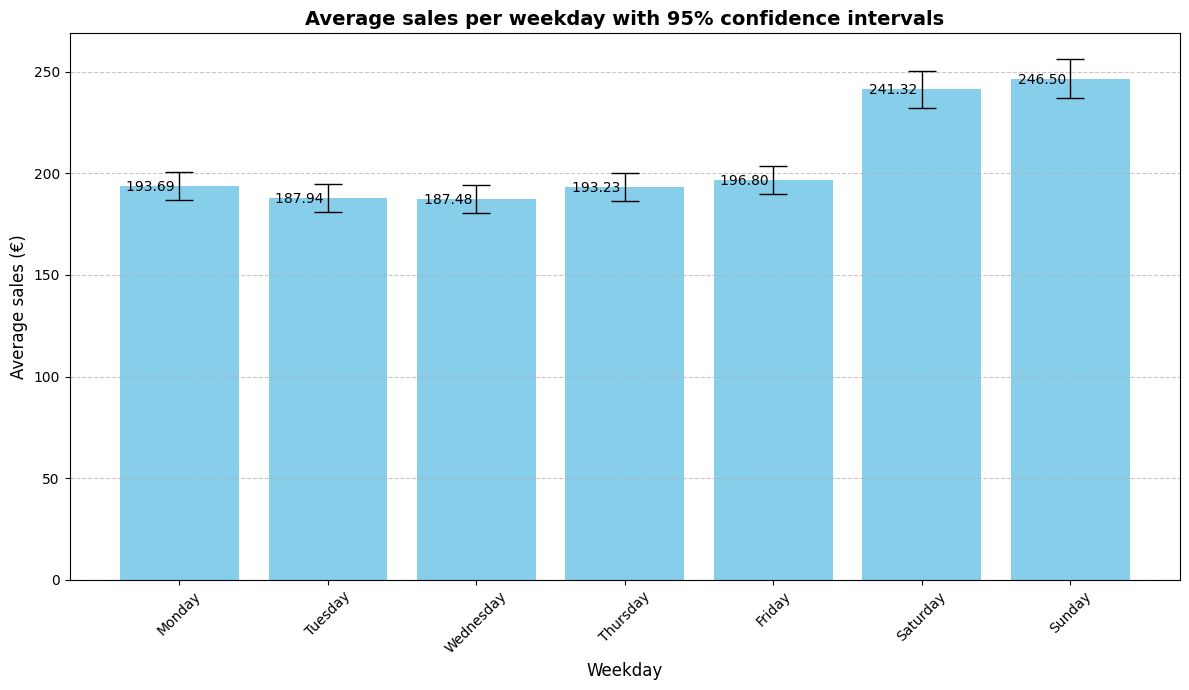

Average sales per weekday with 95% confidence intervals
Monday: 193.69 € ± 6.87 €
Tuesday: 187.94 € ± 6.77 €
Wednesday: 187.48 € ± 6.91 €
Thursday: 193.23 € ± 7.07 €
Friday: 196.80 € ± 6.91 €
Saturday: 241.32 € ± 8.96 €
Sunday: 246.50 € ± 9.56 €

Rows with sales > 850
           id      Datum  Warengruppe       Umsatz  Wochentag Wochentag_Name
1845  1307272 2013-07-27            2   855.619095          5       Saturday
1846  1307282 2013-07-28            2   871.802546          6         Sunday
1852  1308032 2013-08-03            2   930.801703          5       Saturday
1853  1308042 2013-08-04            2   862.752429          6         Sunday
2119  1405052 2014-05-05            2  1203.431130          0         Monday
2173  1406282 2014-06-28            2   861.858617          5       Saturday
2215  1408092 2014-08-09            2   874.906746          5       Saturday
2229  1408242 2014-08-24            2   861.503164          6         Sunday
7403  1312315 2013-12-31            5 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

umsatzdaten_gekuerzt = pd.read_csv("https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv")

print(umsatzdaten_gekuerzt)

# Make a bar chart to show the relationship of average sales per weekday

# Convert the 'Datum' column to datetime format
umsatzdaten_gekuerzt['Datum'] = pd.to_datetime(umsatzdaten_gekuerzt['Datum'])

# Extract the day of week from the date (0 = Monday, 6 = Sunday)
umsatzdaten_gekuerzt['Wochentag'] = umsatzdaten_gekuerzt['Datum'].dt.dayofweek

# Create a mapping for weekday names
weekday_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Map the numeric weekday to its name
umsatzdaten_gekuerzt['Wochentag_Name'] = umsatzdaten_gekuerzt['Wochentag'].map(weekday_names)

# Calculate statistics for each weekday
weekday_stats = {}
ordered_weekdays = [weekday_names[i] for i in range(7)]  # Ensure correct weekday order

for day in ordered_weekdays:
    day_data = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['Wochentag_Name'] == day]['Umsatz']
    
    # Calculate mean
    mean = day_data.mean()
    
    # Calculate 95% confidence interval
    if len(day_data) > 1:  # Ensure we have enough data points
        sem = stats.sem(day_data)  # Standard error of the mean
        ci = stats.t.interval(0.95, len(day_data)-1, loc=mean, scale=sem)
        ci_error = mean - ci[0]  # Symmetrical for t-distribution
    else:
        ci_error = 0
    
    weekday_stats[day] = {
        'mean': mean,
        'ci_error': ci_error
    }

# Extract data for plotting
means = [weekday_stats[day]['mean'] for day in ordered_weekdays]
errors = [weekday_stats[day]['ci_error'] for day in ordered_weekdays]

# Create a bar chart with error bars
plt.figure(figsize=(12, 7))
bars = plt.bar(ordered_weekdays, means, color='skyblue', yerr=errors, capsize=10, 
               error_kw={'ecolor': 'black', 'linewidth': 1})

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 4,
             f'{height:.2f} ', ha='right', va='bottom')

# Customize the chart
plt.title('Average sales per weekday with 95% confidence intervals', fontsize=14, fontweight='bold')
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average sales (€)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print the average sales per weekday with 95% confidence intervals
print("Average sales per weekday with 95% confidence intervals")
for day in ordered_weekdays:
    stats_data = weekday_stats[day]
    print(f"{day}: {stats_data['mean']:.2f} € ± {stats_data['ci_error']:.2f} €")
print()

# Look for high sales values
pd.set_option('display.max.rows', 100)
very_high_sales_data = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['Umsatz'] > 850]
print("Rows with sales > 850")
print(very_high_sales_data)


**Conclusion**

The diagram shows that the average sales per weekday have small confidence intervalls and that there are 2 groups:
- Monday through Friday have average sales between 180 and 200.
- But Saturday and Sunday have average sales between 240 and 250. So Saturdays and Sundays should be marked as "weekend".

The filtering for the rows with the highest sales shows:
- All New Year's Eves have exceptionally high sales in product group 5 (cakes), which can be explained by the custom to eat Berliner (Pfannkuchen). So these days should be marked as "New Year's Eve celebration".
- The only other exceptionally high sales value appears on Monday 2014-05-05. This might be an error in the data.
